# Customer Churn Analysis - Descriptive Analytics

## Objective
Explore and understand the characteristics and behaviors of customers who churn versus those who stay.


### Dataset Overview

Dataset is downloaded from the <a href="https://www.kaggle.com/datasets/abdullah0a/telecom-customer-churn-insights-for-analysis">kaggle</a>
- Number of records: `1000`
- Number of features: `10`
- Target variable: `Churn` (Yes/No)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_churn_data.csv')

In [3]:
df.sample(5)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
754,755,35,Male,4,114.10,Month-to-Month,Fiber Optic,456.40,No,Yes
494,495,60,Male,24,49.32,Month-to-Month,DSL,1183.68,No,Yes
134,135,35,Male,18,82.29,One-Year,Fiber Optic,1481.22,No,Yes
959,960,49,Female,3,89.23,Month-to-Month,Fiber Optic,267.69,Yes,Yes
45,46,37,Male,1,82.09,Month-to-Month,NaN,82.09,No,Yes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [23]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [64]:
# Filling missing data with No record
df['InternetService'] = df["InternetService"].fillna("No record")

In [66]:
df["InternetService"].unique()

array(['Fiber Optic', 'DSL', 'No record'], dtype=object)

In [70]:
# Coonfirming no missing value is now present
df.isnull().sum()

Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [74]:
#checking for duplicate value
df.duplicated().sum()

0

In [76]:
df.describe()

,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,44.674000,18.97300,74.391290,1404.364060
std,9.797741,18.89257,25.712083,1571.755048
min,12.000000,0.00000,30.000000,0.000000
25%,38.000000,5.00000,52.357500,345.217500
50%,45.000000,13.00000,74.060000,872.870000
75%,51.000000,26.00000,96.102500,1900.175000
max,83.000000,122.00000,119.960000,12416.250000


In [95]:
print(f"Churn rate: {df[df['Churn'] == 'Yes'].shape[0]/df.shape[0]}", )

Churn rate: 0.883


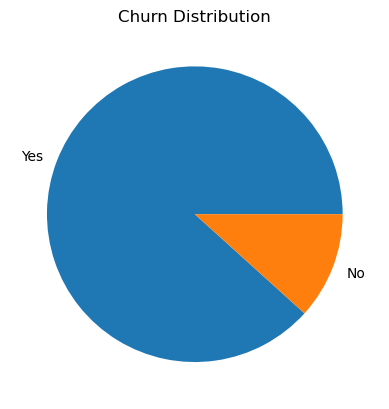

In [89]:
# Pie Chart for Churn
df['Churn'].value_counts().plot(kind='pie', title='Churn Distribution')
plt.ylabel('')
plt.show()

Churn rate of `88.3%` and highly imbalanced data suggests there are a huge amount of customer leaving the services, raising a srious concern, assuming data is randoml selected. Also we need to use techniques like `SMOTE`  and metrics like `F1-score` for dealing with data during mdel training phase

In [78]:
numeric_columns = df.select_dtypes(include=['number'])

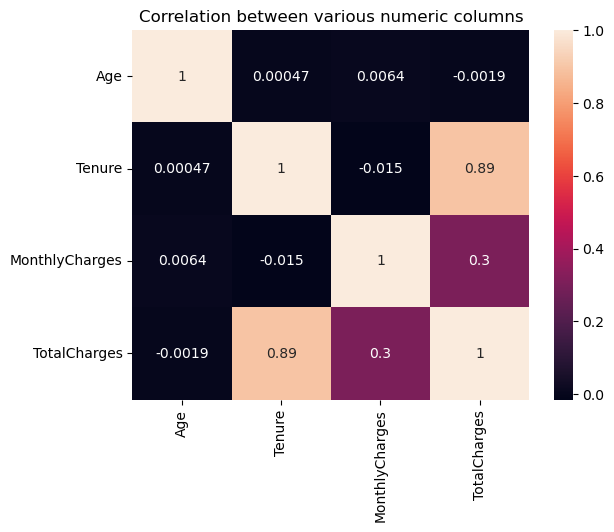

In [84]:
# Correlation between various numeric columns
sns.heatmap(numeric_columns.corr(), annot= True)
plt.title("Correlation between various numeric columns")
plt.show()

Heatmap of correlation between various numeric columns shows that `Tenure` and `TotalCharges` arre highly correlated, possible reason can be greater the person `Tenure` greater will be the `TotalCharges` for him. Also `TotalCharges` also shows a slight positive correlation with `MonthlyCharges`, providing evidence too the claim. 

<Axes: title={'center': 'Average Monthly Charges by Churn'}, xlabel='Churn'>

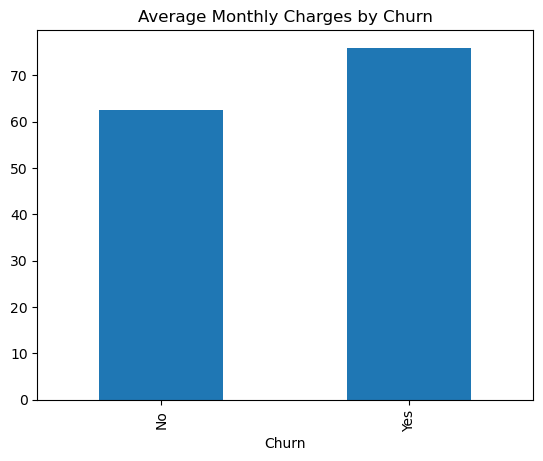

In [100]:
# Average Monthly Charges by Churn
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar', title='Average Monthly Charges by Churn')

Clearly lower monthly charges, results in lower churn. So one strategy is to either lower price or provide discount to customer which are probable to churn

<Axes: title={'center': 'Gender wise Churn Distribution'}, xlabel='Churn'>

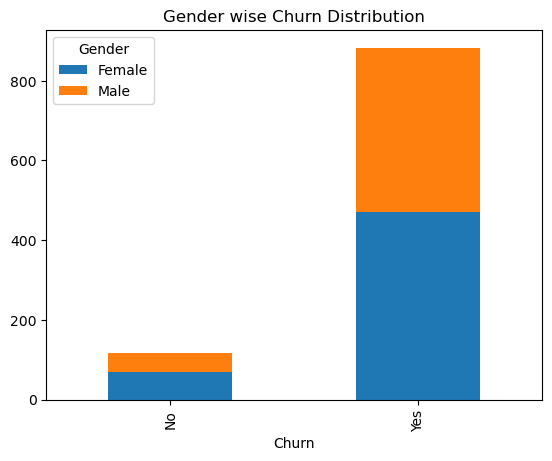

In [98]:
# Gender wise Churn Distribution
df.groupby('Churn')['Gender'].value_counts().unstack().plot(kind='bar', stacked=True, title = "Gender wise Churn Distribution")

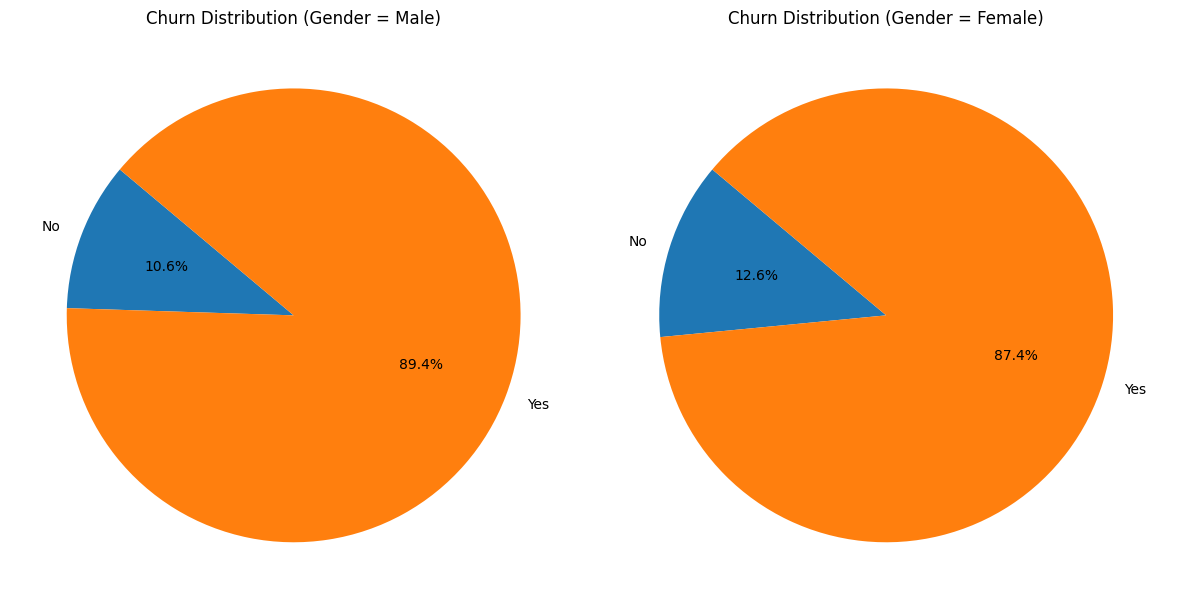

In [16]:
# Group and count
grouped = df.groupby('Gender')['Churn'].value_counts()

# Convert to DataFrame for easier manipulation
grouped_df = grouped.unstack()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].pie(grouped_df.loc['Male'], labels=grouped_df.columns, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Churn Distribution (Gender = Male)')

axes[1].pie(grouped_df.loc['Female'], labels=grouped_df.columns, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Churn Distribution (Gender = Female)')

plt.tight_layout()
plt.show()

There are similarity in gender distribution, so probably gender does not play a crucial role in churn

<Axes: title={'center': 'Average Monthly Charges by Churn and Gender'}, xlabel='Churn'>

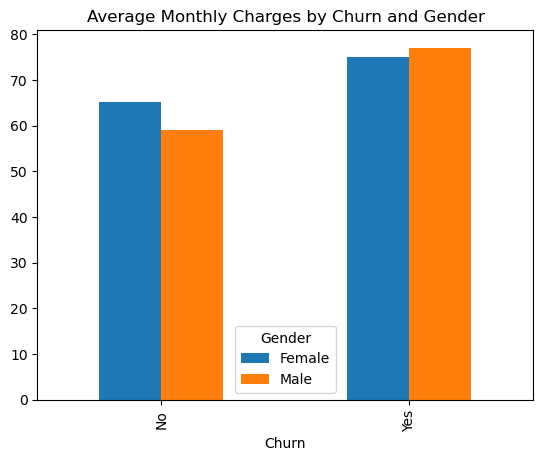

In [43]:
df.groupby(['Churn', 'Gender'])['MonthlyCharges'].mean().unstack().plot(kind='bar', title='Average Monthly Charges by Churn and Gender')

There is a larger gap between difference of avarage monthly price of churn and not churned male and female customers. It suggest that females are not getting benifits from discount or other policy. This maybe due to slightly higher no. of female customers on platform.

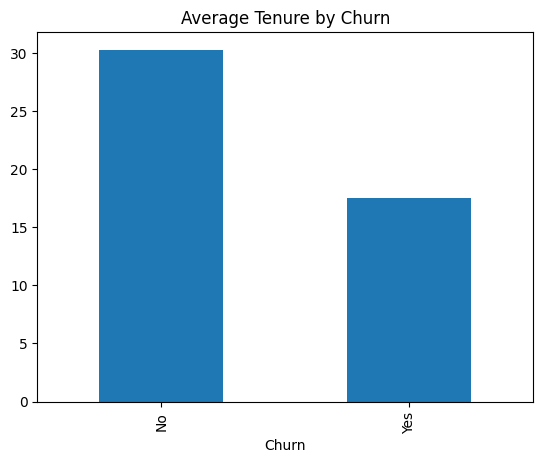

In [8]:
df.groupby('Churn')['Tenure'].mean().plot(kind='bar', title='Average Tenure by Churn')  
plt.show()

Clearly a higher tenure results in more retention of customers.

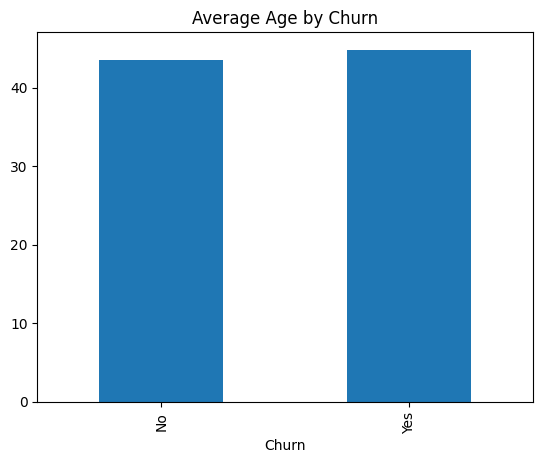

In [9]:
df.groupby('Churn')['Age'].mean().plot(kind='bar', title='Average Age by Churn')
plt.show()

Age is probably not a factor on which churn depends.

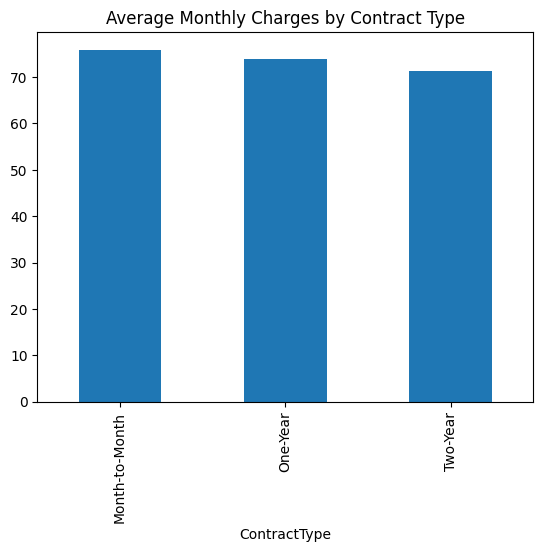

In [10]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar', title='Average Monthly Charges by Contract Type')
plt.show()

This gives idea about payment structure.

<Axes: title={'center': 'Contract Type Distribution by Churn'}, xlabel='Churn'>

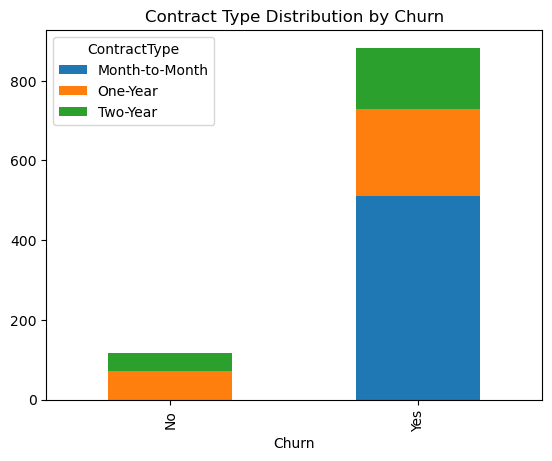

In [50]:
df.groupby('Churn')['ContractType'].value_counts().unstack().plot(kind='bar', stacked=True, title='Contract Type Distribution by Churn')

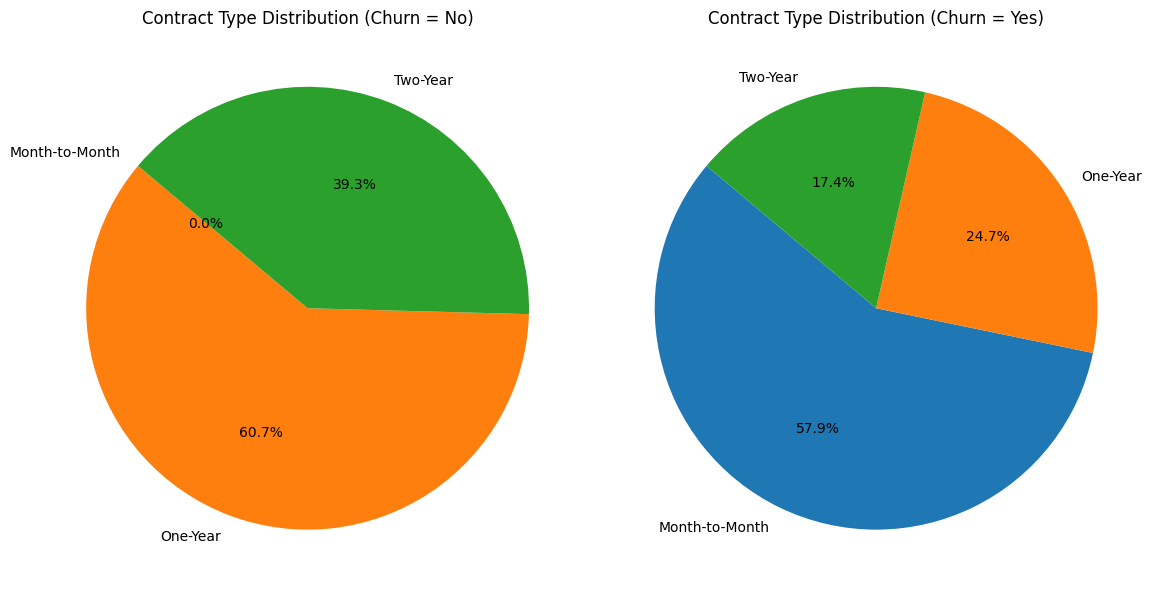

In [13]:
# Group and count
grouped_df = df.groupby('Churn')['ContractType'].value_counts().unstack().fillna(0)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Churn = No pie chart
axes[0].pie(grouped_df.loc['No'], labels=grouped_df.columns, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Contract Type Distribution (Churn = No)')

# Churn = Yes pie chart
axes[1].pie(grouped_df.loc['Yes'], labels=grouped_df.columns, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Contract Type Distribution (Churn = Yes)')

plt.tight_layout()
plt.show()

So there is a strong evidence thateveryone who opted for `Month-to-Month` had churned. So the focus now should be on attracting new customers to `One-Year` and `Two-Year` and try to shift existing customers to longer plans.

<Axes: xlabel='Churn', ylabel='count'>

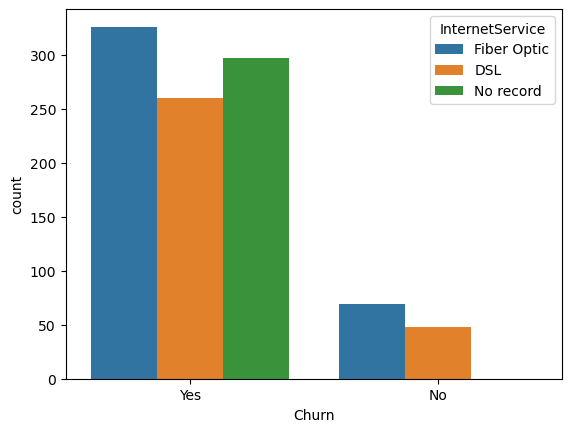

In [52]:
sns.countplot(data=df, x='Churn', hue='InternetService')

So customers who does not provide any  data about their internet services had are likely to churned churned

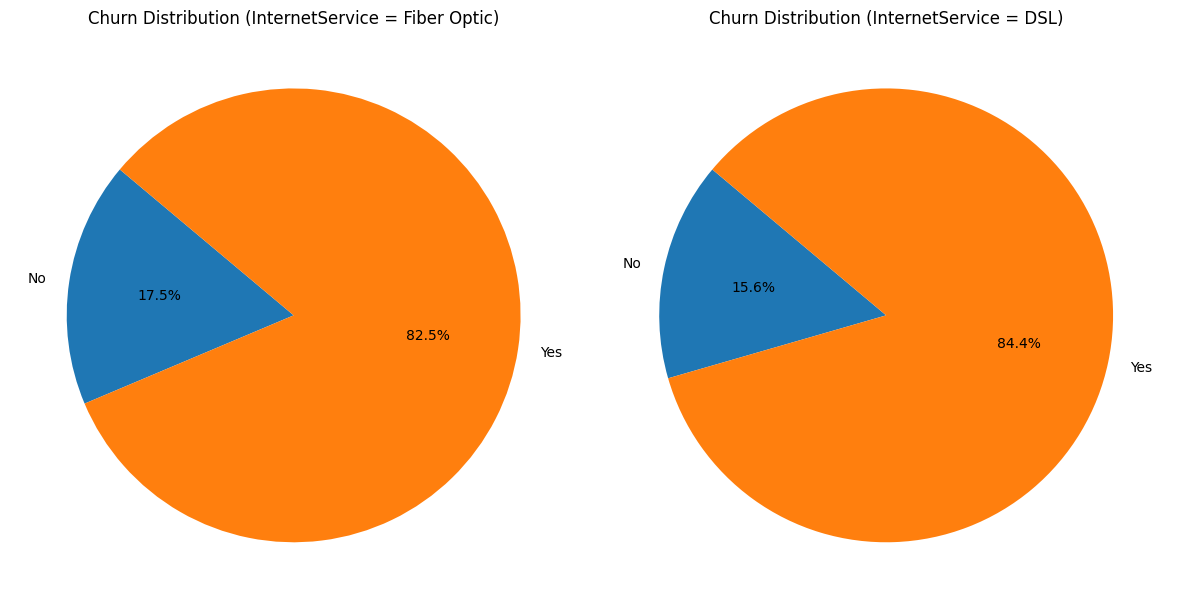

In [17]:
# Group and count
grouped = df.groupby('InternetService')['Churn'].value_counts()

# Convert to DataFrame for easier manipulation
grouped_df = grouped.unstack()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].pie(grouped_df.loc['Fiber Optic'], labels=grouped_df.columns, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Churn Distribution (InternetService = Fiber Optic)')

axes[1].pie(grouped_df.loc['DSL'], labels=grouped_df.columns, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Churn Distribution (InternetService = DSL)')

plt.tight_layout()
plt.show()

Clearly the type of `InternetService` is not influencing churn rate.

<Axes: xlabel='Churn', ylabel='count'>

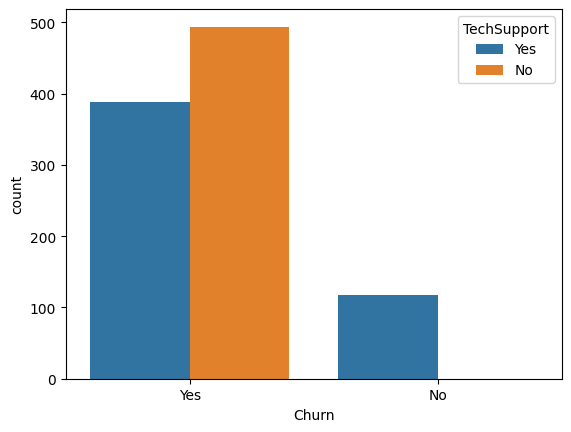

In [18]:
sns.countplot(data=df, x='Churn', hue='TechSupport')

Many customers are opting to churn rather than contacting `TechSupport`. So probably support services are not that good.

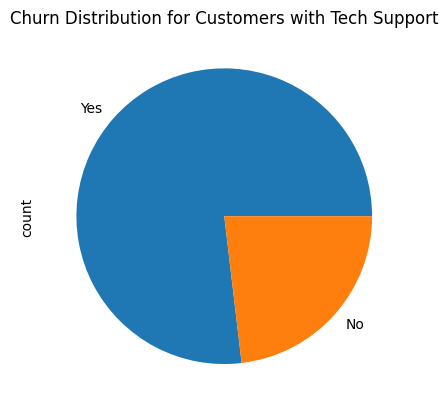

In [21]:
df[df['TechSupport'] == 'Yes']['Churn'].value_counts().plot(kind='pie', title='Churn Distribution for Customers with Tech Support')
plt.show()

A large portion of peeople has churned even after contacting `TechSupport`, further provide evidence of inefficiency of support team